# CRISP Metrics DATA SCIENCE INTERNSHIP:

# NAME:Parul Singh R

# Unsupervised Machine Learning Task

# Perform Data analysis on the Credit Card Fraud Detection data in depth and use Clustering Algorithms.

Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [40]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [41]:
# Reading the datasets
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
df.shape

(284807, 31)

In [44]:
#cheak if any null value in data
df.isnull().values.any()

False

In [45]:
num_missing = (df[1:31] == 0).sum()
# report the results
print(num_missing)

Time       1
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class     30
dtype: int64


In [46]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
# replace '0' values with 'nan'
df[1:31] = df[1:31].replace(0, nan)
# drop rows with missing values
df.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(df.shape)

# retrieve the numpy array
values = df.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

(284777, 31)
Missing: 0


In [47]:
df.isnull().values.any()

False

In [48]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [49]:
df.Class = df.Class.fillna(0).astype(int)
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int32
dtype: object


Text(0, 0.5, 'Frequency')

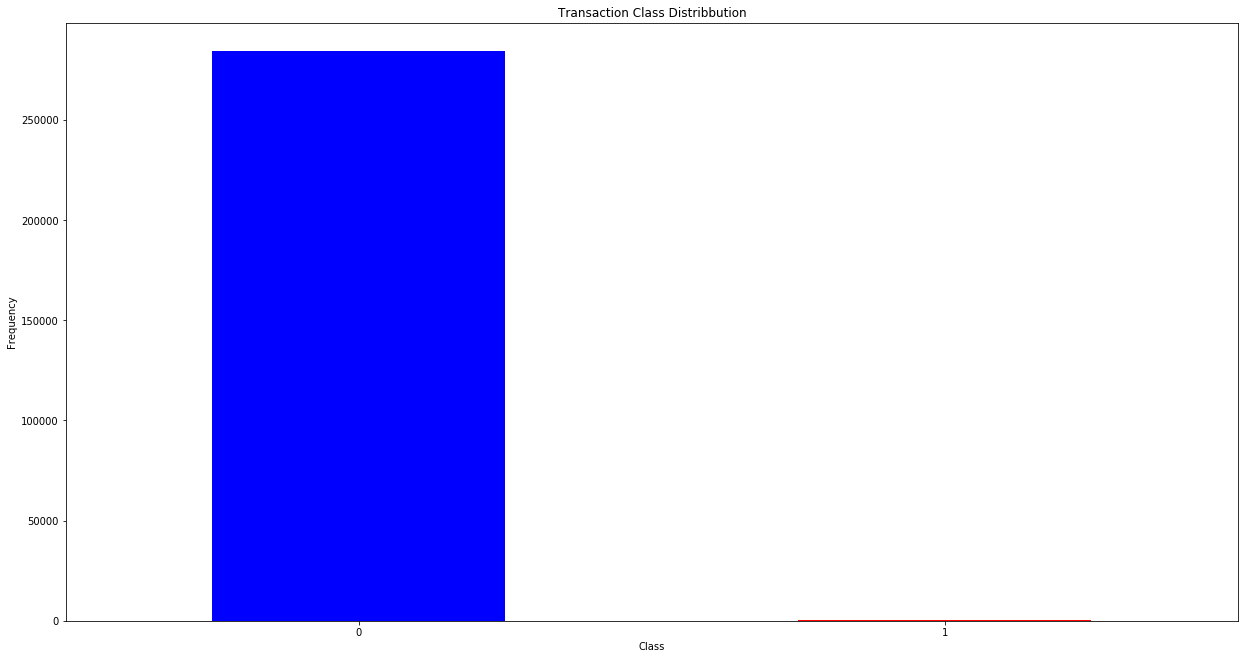

In [50]:
count_classes = pd.value_counts(df['Class'], sort =True)
count_classes.plot(kind = 'bar', rot = 0, color =[ 'blue','red'])
plt.title("Transaction Class Distribbution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [51]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [52]:
print(fraud.shape)
print(normal.shape)

(492, 31)
(284285, 31)


In [53]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [54]:
normal.Amount.describe()

count    284285.000000
mean         88.295177
std         250.116671
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

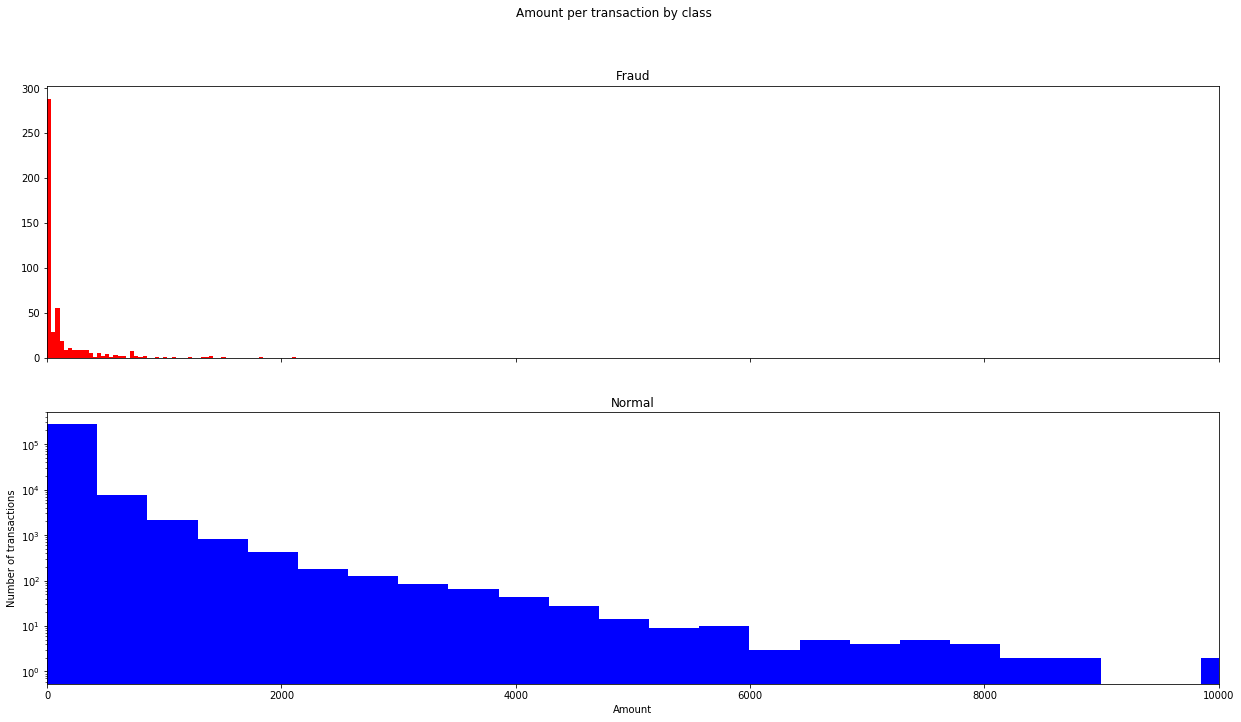

In [55]:
p, (ax1, ax2) = plt.subplots(2,1, sharex = True)
p.suptitle('Amount per transaction by class')
bins = 60
ax1.hist(fraud.Amount, bins = bins, color='red')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='blue')
ax2.set_title('Normal')
plt.rcParams["figure.figsize"] = (21, 11)
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.xlim((0,10000))
plt.yscale('log')
plt.show()

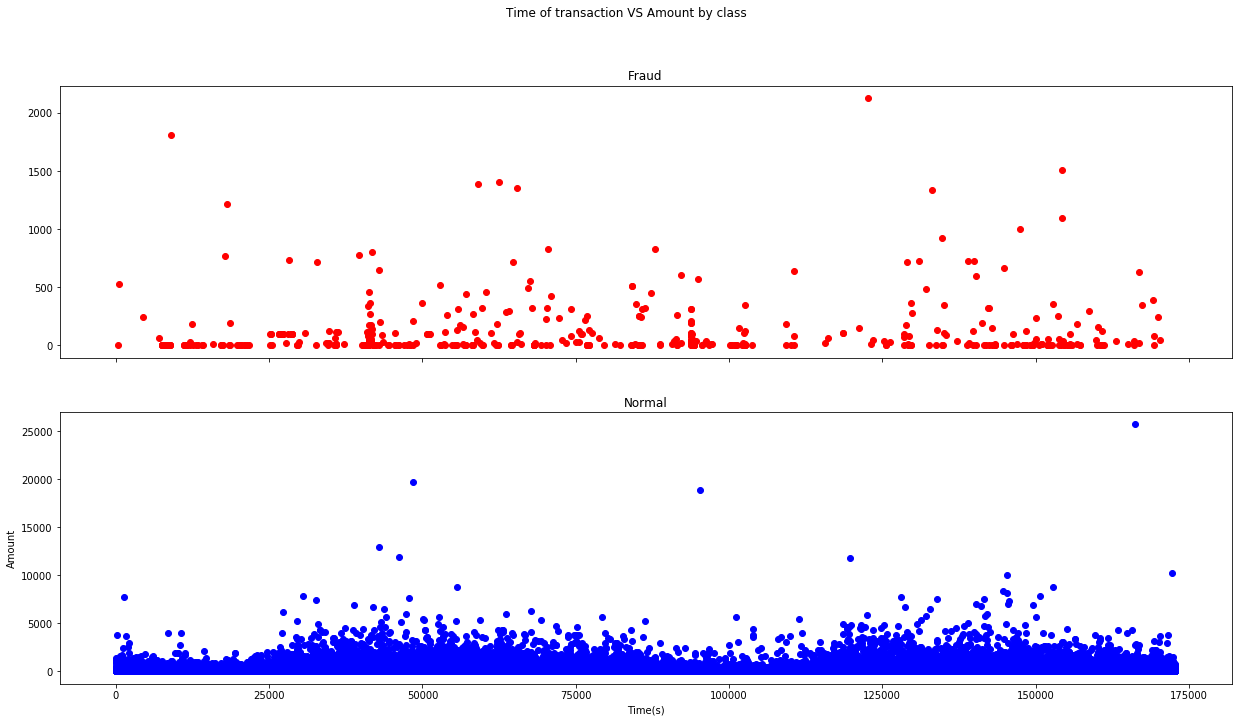

In [56]:
t, (ax1,ax2) = plt.subplots(2, 1, sharex = True)
t.suptitle('Time of transaction VS Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, color='red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='blue')
ax2.set_title('Normal')
plt.xlabel('Time(s)')
plt.ylabel('Amount')
plt.show()

# Data Preparation:

The sample of data is been used in this model 
processing a large data will cause more time

In [57]:
## Take a small sample of the data : as it would take a long time for large datasets

data = df.sample(frac = 0.2,random_state = 1)
data.shape

(56955, 31)

In [58]:
Genuine = data[data['Class']==0]
Fraud = data[data['Class']==1]
outlier_fraction = len(Fraud)/float(len(Genuine))
print('Outlier Fraction :',outlier_fraction)
print('Genuine Cases : {}'.format(len(Genuine)))
print('Fraud Cases : {}'.format(len(Fraud)))

Outlier Fraction : 0.0016707703130495956
Genuine Cases : 56860
Fraud Cases : 95


In [59]:
## Get the correlations

corr_data = data.corr()

In [60]:
print(corr_data)

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.118228 -0.012660 -0.424708 -0.103525  0.178041 -0.063526   
V1      0.118228  1.000000 -0.026798 -0.015419  0.013272 -0.019318  0.000781   
V2     -0.012660 -0.026798  1.000000 -0.020809  0.010725 -0.013603  0.004684   
V3     -0.424708 -0.015419 -0.020809  1.000000  0.004986 -0.022796  0.004883   
V4     -0.103525  0.013272  0.010725  0.004986  1.000000  0.001291 -0.009353   
V5      0.178041 -0.019318 -0.013603 -0.022796  0.001291  1.000000  0.030567   
V6     -0.063526  0.000781  0.004684  0.004883 -0.009353  0.030567  1.000000   
V7      0.083622  0.016303  0.006688  0.027363 -0.003791  0.049219 -0.034603   
V8     -0.043790  0.010066 -0.010001  0.009720  0.000484  0.007089  0.001922   
V9     -0.003793  0.001950  0.003740  0.004496 -0.000685  0.007820 -0.005097   
V10     0.033212  0.005085 -0.000468  0.006917 -0.013978 -0.003751  0.004248   
V11    -0.241470 -0.002517  0.004335 -0.

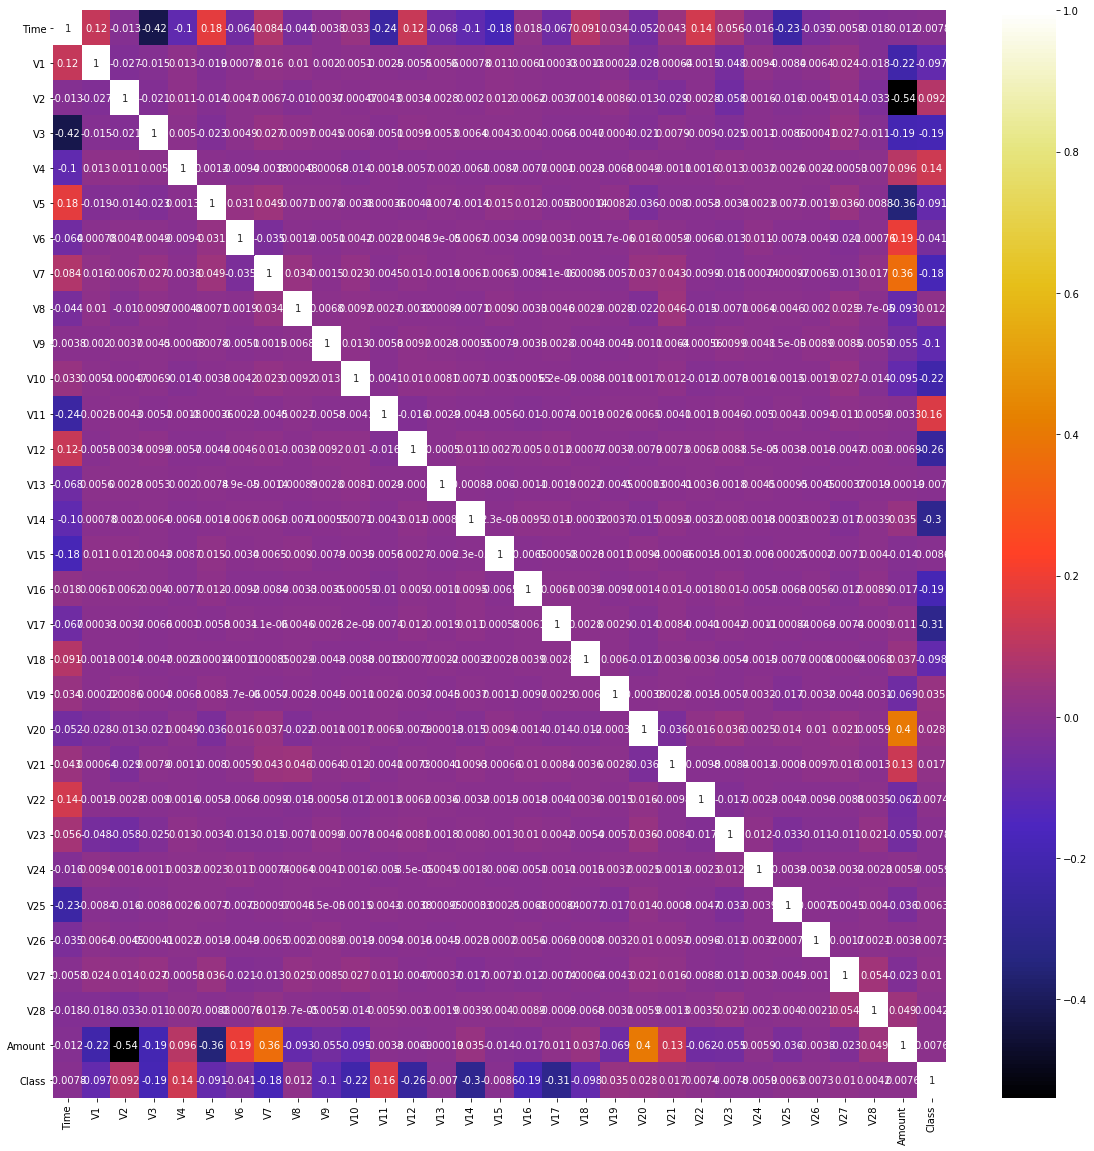

In [61]:
corr_features = corr_data.index
plt.figure(figsize = (20,20))
b = sns.heatmap(data[corr_features].corr(),annot=True,cmap="CMRmap")

# ELBOW METHOD

The Elbow method is used to find the optimum number of clusters

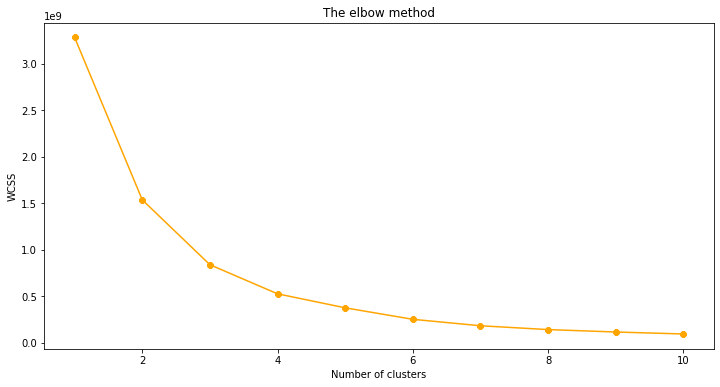

In [68]:
x = data.iloc[:,1: ].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    

plt.figure(figsize=(12,6))
plt.grid
plt.plot(range(1, 11), wcss, color = 'orange', marker = "8")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

the optimum number of clusters is found where the curve(elbow) occurs

# K-MEANS CLASSIFIER

In [69]:
from sklearn.cluster import KMeans

In [71]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 50)
y_kmeans = kmeans.fit_predict(x)

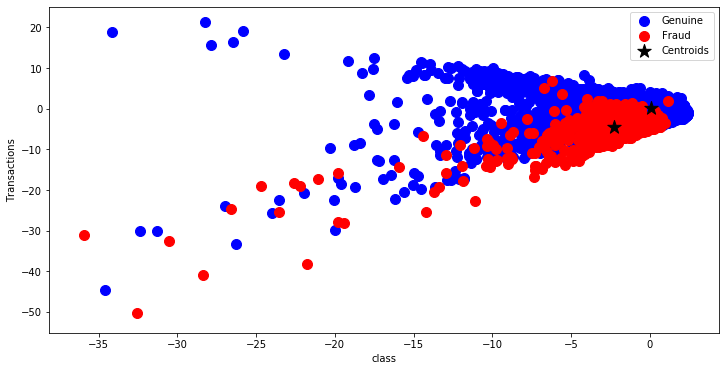

In [73]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Genuine')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Fraud')

plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0,1], marker  = '*', s = 200, c = 'black', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1,1], marker = '*', s = 200, c = 'black')
plt.xlabel('class')
plt.ylabel('Transactions')
plt.legend()
plt.show()

the above plot shows the two clusters blue shows genuine and red shows fraud transactions
but this plot is still overlapping.

In [74]:
from sklearn.datasets import make_blobs
dataset = make_blobs(n_samples = 1000, centers = 2, n_features=2, cluster_std=1.6, random_state=50)

In [75]:
points = dataset[0]

In [77]:
# Create K_means objects
kmeans = KMeans(n_clusters=2)

# Fit the Kmeans object to the dataset
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
clusters = kmeans.cluster_centers_
print(clusters)

[[-4.9157015  -2.04486171]
 [-0.0543247  -5.50258267]]


In [79]:
# To recalcuate the positions of the clusters
ykm = kmeans.fit_predict(points)
ykm

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [80]:
points

array([[ 1.96114026, -5.98922246],
       [ 2.7243868 , -4.66816151],
       [-2.17379936, -4.24648942],
       ...,
       [-1.31033639, -4.36479623],
       [-0.01697921, -8.55205287],
       [-1.71942974, -1.41898061]])

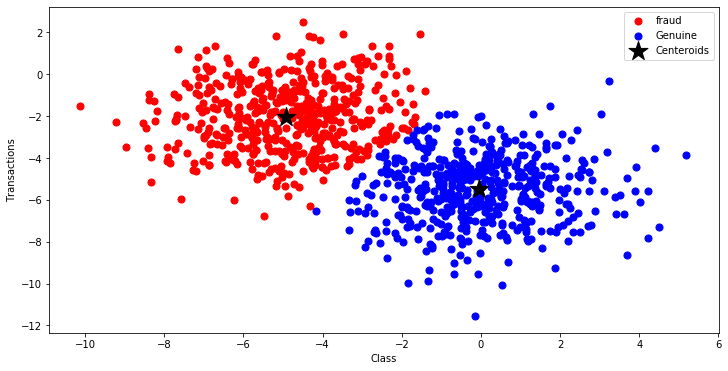

In [82]:
plt.figure(figsize=(12,6))
plt.scatter(points[ykm == 0,0], points[ykm == 0,1], s = 50, color = 'red', label = 'fraud')
plt.scatter(points[ykm == 1,0], points[ykm == 1,1], s = 50, color = 'blue', label = 'Genuine')
plt.scatter(clusters[0][0], clusters[0][1], marker = '*', s = 400, color = 'black')
plt.scatter(clusters[1][0], clusters[1][1], marker = '*', s = 400, color = 'black', label = 'Centeroids')
plt.xlabel('Class')
plt.ylabel('Transactions')
plt.legend()
plt.show()

# CONCLUSION:

This notebook plots represents the red dots as the number of fraud transactions and blue as number of genuine transactions.

# Thank you..